In [51]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# supress warnings
import warnings
warnings.filterwarnings('ignore')

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['wisconsin_breast_cancer.csv']


## Andre Ofsoski 1314669
## Reece Breebaart 1314828

In [52]:
df = pd.read_csv('../input/wisconsin_breast_cancer.csv')
df = df.fillna(0)
df.head(5)

,id,thickness,size,shape,adhesion,single,nuclei,chromatin,nucleoli,mitosis,class
0,1000025,5,1,1,1,2,1.0,3,1,1,0
1,1002945,5,4,4,5,7,10.0,3,2,1,0
2,1015425,3,1,1,1,2,2.0,3,1,1,0
3,1016277,6,8,8,1,3,4.0,3,7,1,0
4,1017023,4,1,1,3,2,1.0,3,1,1,0


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
id           699 non-null int64
thickness    699 non-null int64
size         699 non-null int64
shape        699 non-null int64
adhesion     699 non-null int64
single       699 non-null int64
nuclei       699 non-null float64
chromatin    699 non-null int64
nucleoli     699 non-null int64
mitosis      699 non-null int64
class        699 non-null int64
dtypes: float64(1), int64(10)
memory usage: 60.1 KB


In [54]:
df.describe()


,id,thickness,size,shape,adhesion,single,nuclei,chromatin,nucleoli,mitosis,class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.463519,3.437768,2.866953,1.589413,0.344778
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,3.640708,2.438364,3.053634,1.715078,0.475636
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,0.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,0.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,5.000000,4.000000,1.000000,1.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000


In [55]:
from sklearn.model_selection import train_test_split
x=df.iloc[:,1:10]
y=df.iloc[:,-1]
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, test_size=0.20, random_state=1314669)
print (x_train.shape, y_train.shape)

(559, 9) (559,)


In [56]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=1314669)
sgd_clf.fit(x_train, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=1314669, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [57]:
columns = ["thickness", "size", "shape", "adhesion", "single", "nuclei", "chromatin", "nucleoli", "mitosis"]
allCombos = []

def get_subsets(fullset):
    listrep = list(fullset)
    
    subsets = []
    for i in range(2**len(listrep)):
        subset = []
        for n in range(len(listrep)):      
            if i & 1<<n:
                subset.append(listrep[n])
        subsets.append(subset)
    return subsets[1:]

allCombos = get_subsets(columns)
    
print(allCombos)
print(len(allCombos))

[['thickness'], ['size'], ['thickness', 'size'], ['shape'], ['thickness', 'shape'], ['size', 'shape'], ['thickness', 'size', 'shape'], ['adhesion'], ['thickness', 'adhesion'], ['size', 'adhesion'], ['thickness', 'size', 'adhesion'], ['shape', 'adhesion'], ['thickness', 'shape', 'adhesion'], ['size', 'shape', 'adhesion'], ['thickness', 'size', 'shape', 'adhesion'], ['single'], ['thickness', 'single'], ['size', 'single'], ['thickness', 'size', 'single'], ['shape', 'single'], ['thickness', 'shape', 'single'], ['size', 'shape', 'single'], ['thickness', 'size', 'shape', 'single'], ['adhesion', 'single'], ['thickness', 'adhesion', 'single'], ['size', 'adhesion', 'single'], ['thickness', 'size', 'adhesion', 'single'], ['shape', 'adhesion', 'single'], ['thickness', 'shape', 'adhesion', 'single'], ['size', 'shape', 'adhesion', 'single'], ['thickness', 'size', 'shape', 'adhesion', 'single'], ['nuclei'], ['thickness', 'nuclei'], ['size', 'nuclei'], ['thickness', 'size', 'nuclei'], ['shape', 'nucl

In [58]:
from sklearn.model_selection import cross_val_score
scores = []
#generate accuracy for all subsets
for n in range(511):
    scores.append(np.mean(cross_val_score(sgd_clf, x_train[allCombos[n]], y_train, cv=10, scoring="accuracy")))
#finding the max and its index
print("Max accuracy:",max(scores)," Index:", scores.index(max(scores)))

Max accuracy: 0.9679778992936889  Index: 354


In [59]:
#same thing but on test data
testScores = []
#generate accuracy for all subsets
for n in range(511):
    testScores.append(np.mean(cross_val_score(sgd_clf, x_test[allCombos[n]], y_test, cv=10, scoring="accuracy")))
#finding the max and its index
print("Max accuracy:",max(testScores)," Index:", testScores.index(max(testScores)))
print("Subset 354:",testScores[354])

Max accuracy: 0.9575457875457876  Index: 292
Subset 354: 0.8604029304029304


# Discussion
From the above cross validation scores, we can see that the highest accuracy was gained from the 354th subset using the train data (0.968), and the 292nd subset was the most accurate when using the test data (0.958). Therefore it looks like the 354th subset seems to be the best given the cross-validation scores. On the test scores, however, the same subset (354) had an accuracy of 0.86. This indicates that these tests may not be the best way to test data accuracy.



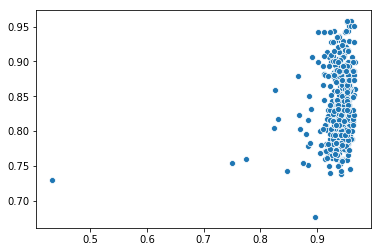

In [60]:
import seaborn as sns
sns.scatterplot(scores, testScores)

In [61]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=30, random_state= 1314669)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(x_train,y_train)

y_pred=clf.predict(x_test)

print(y_pred)


[0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 0 1 1 1 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 1 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 1 0 1 0
 1 1 0 0 1 1 1 0 0 1 0 0 1 0 0 0 1 0 0 1 0 1 0 0 0 0 1 1 1 1 1 1 0 1 0 0 1
 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 1 1 0 0 1 0 0 0 0 1]


In [62]:
# Model Accuracy, how often is the classifier correct?
forestScores = []
#generate accuracy for all subsets
for n in range(511):
    forestScores.append(np.mean(cross_val_score(clf, x_train[allCombos[n]], y_train, cv=10, scoring="accuracy")))
#finding the max and its index
print("Max accuracy:",max(forestScores)," Index:", forestScores.index(max(forestScores)))


Max accuracy: 0.9732712462975621  Index: 446


In [63]:
#same thing but on test data
forestTestScores = []
#generate accuracy for all subsets
for n in range(511):
    forestTestScores.append(np.mean(cross_val_score(clf, x_test[allCombos[n]], y_test, cv=10, scoring="accuracy")))
#finding the max and its index
print("Max accuracy:",max(forestTestScores)," Index:", forestTestScores.index(max(forestTestScores)))
print("Subset 446:",forestTestScores[446])

Max accuracy: 0.9790476190476192  Index: 45
Subset 446: 0.9719047619047618


# Discussion
In both the train and test cases of using the Random Trees classifier, the maximum accuracy increased. On the train data, the highest accuracy increased to 0.973, shown in subset 446. Its accuracy using the test data, however, was slightly lower at 0.972. The highest accuracy on the test data was shown by the 45th subset, with a score of 0.979. This is quite a lot larger than the previous test's highest test accuracy, which therefore indicates this is a more accurate test.

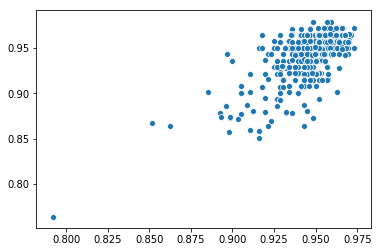

In [64]:
import seaborn as sns
sns.scatterplot(forestScores, forestTestScores)

In [65]:
from sklearn.naive_bayes import GaussianNB
gClf = GaussianNB()
gClf.fit(x_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [66]:
gaussianScore = []
#generate accuracy for all subsets
for n in range(511):
    gaussianScore.append(np.mean(cross_val_score(gClf, x_train[allCombos[n]], y_train, cv=10, scoring="accuracy")))
#finding the max and its index
print("Max accuracy:",max(gaussianScore)," Index:", gaussianScore.index(max(gaussianScore)))

Max accuracy: 0.9660947824105719  Index: 44


In [67]:
gaussianTestScore = []
#generate accuracy for all subsets
for n in range(511):
    gaussianTestScore.append(np.mean(cross_val_score(gClf, x_test[allCombos[n]], y_test, cv=10, scoring="accuracy")))
#finding the max and its index
print("Max accuracy:",max(gaussianTestScore)," Index:", gaussianTestScore.index(max(gaussianTestScore)))
print("Subset 44:",gaussianTestScore[44])

Max accuracy: 0.9790476190476192  Index: 53
Subset 44: 0.9438095238095239


# Discussion
As can be seen above, the accuracy of both train and test subtests from the Gaussian classifier were fairly similar to that of the Random Trees Classifier. Out of the two Gaussian tests, the test data prodcued the higher accuracy of 0.979 (index 53) compared to the train data of 0.966 (index 44). Furthermore, index 44s accuracy decreased to 0.944 using the test data. This shows that the test subset of index 53 looks better given the cross-validation scores as it has higher accuracy. Interestingly the Gaussian test subset (index 53) has the same accuracy score to that of the Random Trees test subset data (index 45).

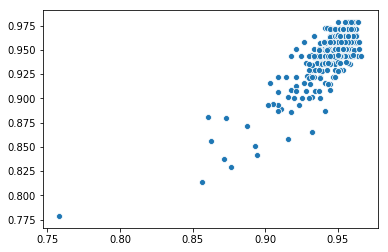

In [68]:
import seaborn as sns
sns.scatterplot(gaussianScore, gaussianTestScore)

In [69]:
SGDscore = sgd_clf.predict(x)

In [70]:
TREEscore = clf.predict(x)

In [71]:
GAUSSINscore = gClf.predict(x)

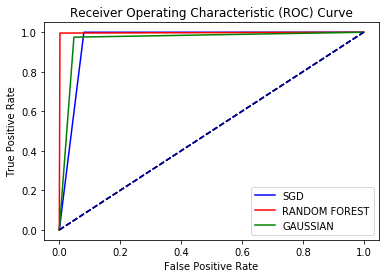

In [72]:
import matplotlib.pyplot as plt  
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from itertools import cycle

def plot_roc_curve(fpr, tpr, l):  
    plt.plot(fpr, tpr, 'b:', color='orange', label=l)
    #plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

models = [SGDscore, TREEscore, GAUSSINscore]

for m in models:
    fpr, tpr, thresholds = roc_curve(y, m)
    if m is SGDscore:
        lbl = 'SGD'
        clr = 'blue'
    if m is TREEscore:
        lbl = 'RANDOM FOREST'
        clr = 'red'
    if m is GAUSSINscore:
        lbl = 'GAUSSIAN'
        clr = 'green'
    plt.plot(fpr, tpr, 'b:', color=clr, label=lbl, linestyle='-')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")